<a href="https://colab.research.google.com/github/MerkulovDaniil/optim/blob/master/assets/Notebooks/Balls_p_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

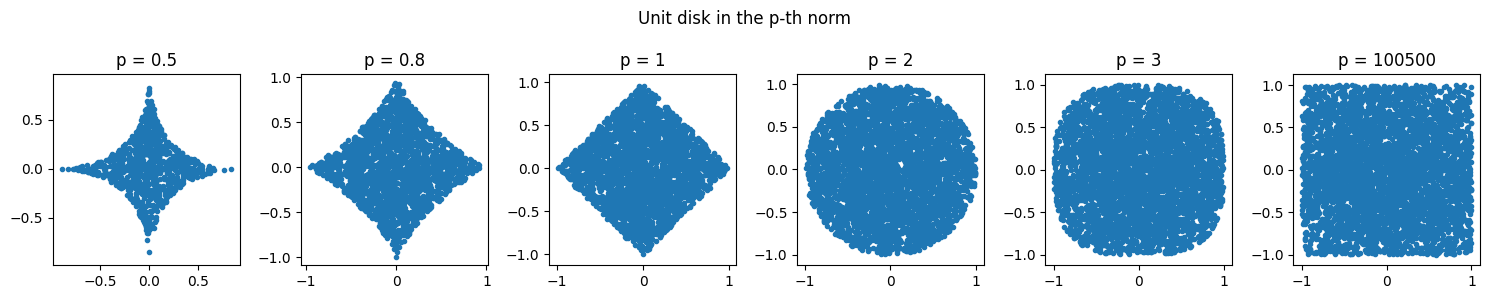

In [1]:
%matplotlib inline
import jax
from jax import numpy as jnp, vmap
import matplotlib.pyplot as plt

p_values = [0.5, 0.8, 1,2,3,100500]
M = 10000 # Number of sampling points

def compute_points(p, key):
    a = jax.random.normal(key, (1, 2))
    norm_value = jnp.linalg.norm(a[0, :], p)
    return jnp.where(norm_value <= 1, a[0, :], jnp.array([float('nan'), float('nan')]))

fig, axes = plt.subplots(1, len(p_values), figsize=(2.5*len(p_values), 3))
axes = axes.ravel()

for i, p in enumerate(p_values):
    keys = jax.random.split(jax.random.PRNGKey(i), M)  # Note: Modified key generation to make samples unique per `p`
    results = vmap(lambda k: compute_points(p, k))(keys)
    valid_points = results[~jnp.isnan(results[:, 0])]
    axes[i].plot(valid_points[:, 0], valid_points[:, 1], '.')
    axes[i].axis('equal')
    axes[i].set_title(f'p = {p}')

plt.suptitle('Unit disk in the p-th norm')
plt.tight_layout()  # Adjust layout to ensure proper visualization
# plt.savefig("p_balls.svg")
plt.show()

# Animation

In [32]:
%matplotlib inline
import jax
from jax import numpy as jnp, vmap
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

p_values = jnp.logspace(-0.99, 0.99, 180)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.grid(linestyle=":")

def init():
    ax.clear()
    ax.grid(linestyle=":")
    return ax,

def update(p):
    x = jnp.linspace(-1, 1, 401)
    y_positive = jnp.power(1 - jnp.power(jnp.abs(x), p), 1/p)
    y_negative = -y_positive

    ax.clear()
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.fill_between(x, y_positive, y_negative, color='blue', alpha=0.6)
    ax.grid(linestyle=":")
    ax.set_title(f'p-norm unit ball. p = {p:.1f}')
    return ax,

frames_sequence = jnp.concatenate([p_values, p_values[::-1]])

ani = FuncAnimation(fig, update, frames=frames_sequence, init_func=init,
                    interval=1000/60, repeat=True)  # Set repeat to True

ax.axis('equal')
plt.close()
# To display the animation in the notebook
from IPython import display
html = display.HTML(ani.to_html5_video())
display.display(html)

# Uncomment the following line if you want to save the animation as a video
ani.save("p_balls_animation.mp4", writer='ffmpeg', fps=60, dpi=300)